**Implement a KNN model to classify the animals in to categories**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Gridsearch
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report


In [31]:
# Read input csv file 
df_zoo = pd.read_csv('Zoo.csv')
df_zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## **EDA (Exploratory Data Analysis)**

In [32]:
# Drop animal name column
df_zoo.drop('animal name', axis='columns', inplace=True)

In [33]:
df_zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
df_zoo.shape

(101, 17)

In [35]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [36]:
df_zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Observation: All fields are categorical variables. All input features except column legs are binomminal only. No null values exists. Since these categorical column values are not ordinal, we need to execute get_dummies to create categorical related columns.  

In [37]:
df_zoo_x = df_zoo.drop('type', axis='columns')
df_zoo_y = df_zoo['type']

In [38]:
# Convert input features into categorical

for x in df_zoo_x.columns:
  df_zoo_x[x] = df_zoo_x[x].astype('category')

df_zoo_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hair      101 non-null    category
 1   feathers  101 non-null    category
 2   eggs      101 non-null    category
 3   milk      101 non-null    category
 4   airborne  101 non-null    category
 5   aquatic   101 non-null    category
 6   predator  101 non-null    category
 7   toothed   101 non-null    category
 8   backbone  101 non-null    category
 9   breathes  101 non-null    category
 10  venomous  101 non-null    category
 11  fins      101 non-null    category
 12  legs      101 non-null    category
 13  tail      101 non-null    category
 14  domestic  101 non-null    category
 15  catsize   101 non-null    category
dtypes: category(16)
memory usage: 3.7 KB


In [39]:
df_zoo_x = pd.get_dummies(df_zoo_x)
df_zoo_x.head()

,hair_0,hair_1,feathers_0,feathers_1,eggs_0,eggs_1,milk_0,milk_1,airborne_0,airborne_1,...,legs_4,legs_5,legs_6,legs_8,tail_0,tail_1,domestic_0,domestic_1,catsize_0,catsize_1
0,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1
2,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
4,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,1


## **Grid Search for Algorithm Tuning**

In [40]:
knn = KNeighborsClassifier()

In [46]:
param_grid = {'n_neighbors': range(1,40)}
print(param_grid)
grid = GridSearchCV(knn, param_grid=param_grid)
grid.fit(df_zoo_x, df_zoo_y)

{'n_neighbors': range(1, 40)}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)})

In [47]:
print('Best Score: ', grid.best_score_)
print('Best Params ', grid.best_params_)

Best Score:  0.96
Best Params  {'n_neighbors': 1}


## **Visualizing Cross Validation Results**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

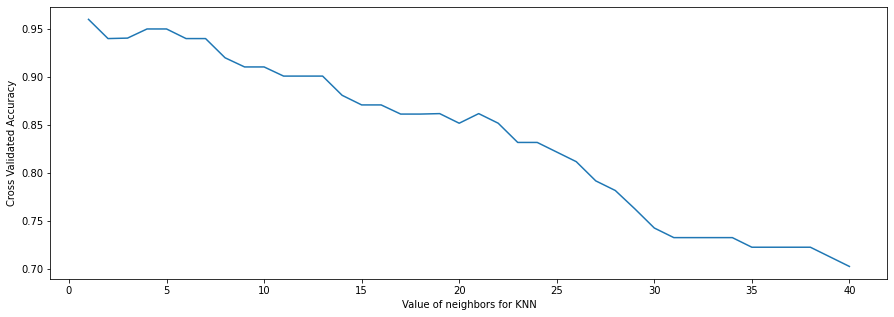

In [48]:
k_range = range(1,41)
k_scores = []

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(knn, df_zoo_x, df_zoo_y, cv=5)
  k_scores.append(scores.mean())

plt.figure(figsize=(15,5))
plt.plot(k_range, k_scores)
plt.xlabel('Value of neighbors for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()

Observe that maximum accuracy can be obtained with n_neighbors = 1 only

## **Final KNN model creation**

In [49]:
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(df_zoo_x, df_zoo_y)

KNeighborsClassifier(n_neighbors=1)

## **Prediction and Evaluation of model**

In [51]:
pred = knn_final.predict(df_zoo_x)
pred[0:10]

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1])

In [52]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
confusion_matrix(df_zoo_y, pred)

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]])

In [59]:
print(classification_report(df_zoo_y, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



Observation: Newly created KNN model predicted with 100% accuracy.